# import the needed the librarires

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load the dataset

In [2]:
data = load_iris()
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [3]:
iris = pd.DataFrame(data.data)

In [4]:
iris.columns = data.feature_names

In [5]:
iris['class'] = data.target

In [6]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# EDA

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


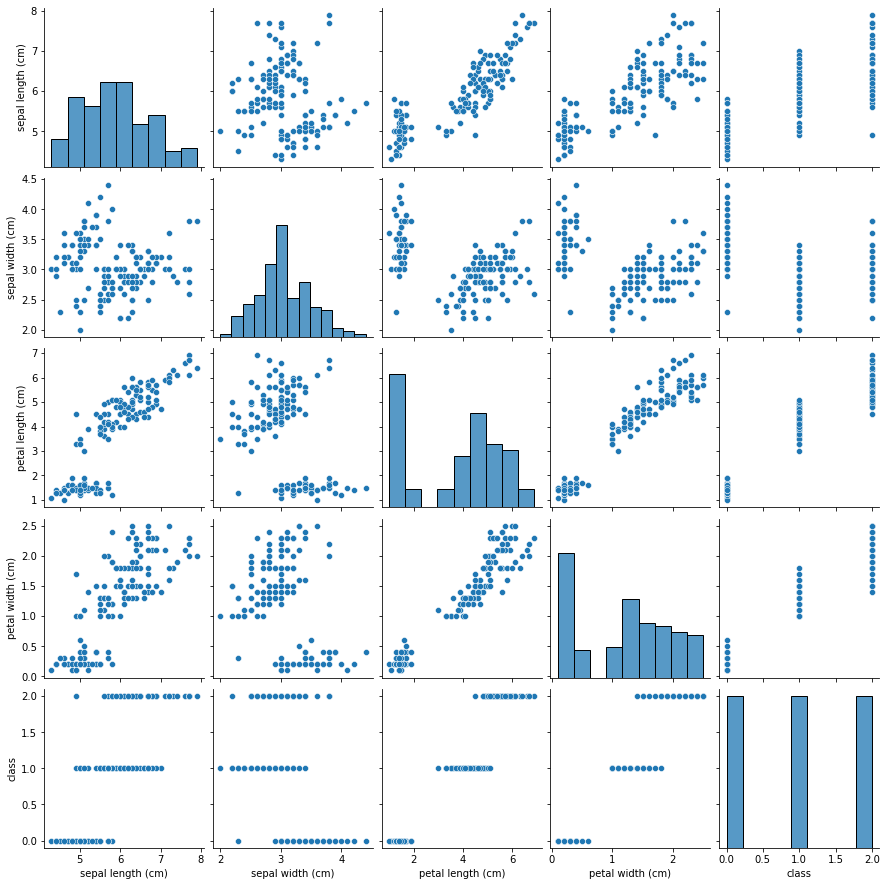

In [9]:
sns.pairplot(iris)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

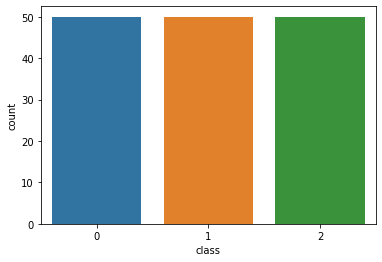

In [10]:
sns.countplot(iris['class'])

In [11]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


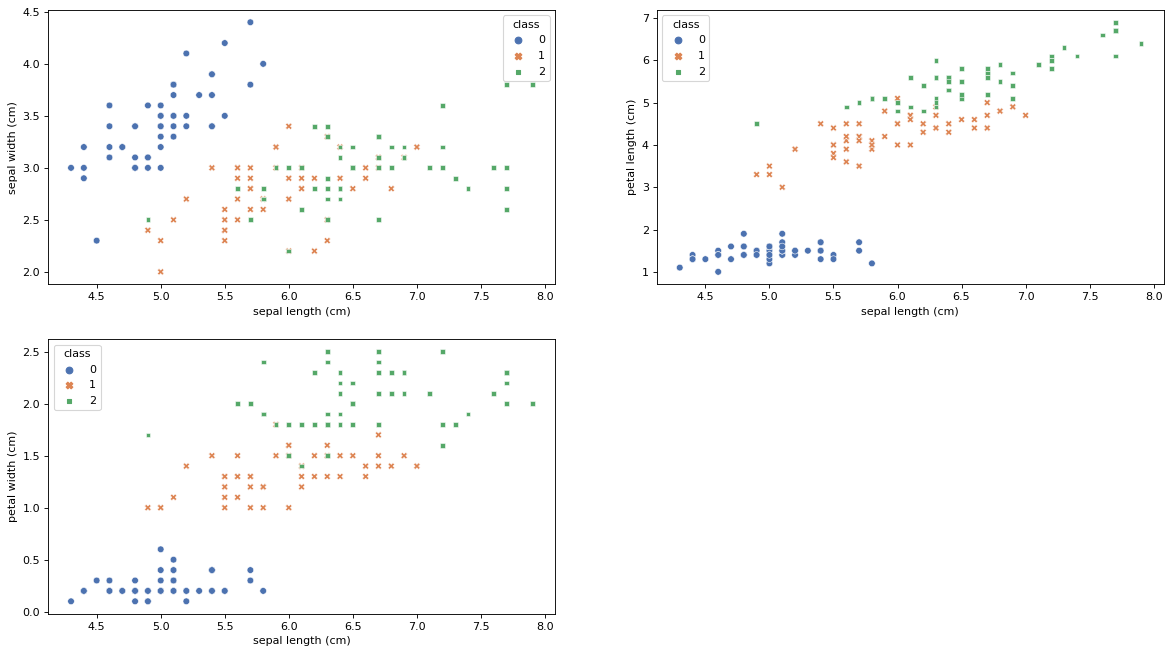

In [12]:
plt.figure(figsize=(18, 10), dpi=80)
plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal length (cm)' ,y = 'sepal width (cm)' ,data= iris,hue ='class' ,style ='class' ,palette ='deep')

plt.subplot(2, 2, 2)
sns.scatterplot(x='sepal length (cm)' ,y = 'petal length (cm)' ,data= iris,hue ='class' ,style ='class' ,palette ='deep')

plt.subplot(2, 2, 3)
sns.scatterplot(x='sepal length (cm)' ,y = 'petal width (cm)' ,data= iris,hue ='class' ,style ='class' ,palette ='deep')

plt.show()

# Split the model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train the model using decision tree 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
ds_tree = DecisionTreeClassifier()
ds_tree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions

In [18]:
# Predictions for a single row
ds_tree.predict([[5.0 , 3.3, 1.4, 0.2]])

array([0])

In [19]:
# prediction for x test
predictions = ds_tree.predict(X_test)

In [20]:
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


# Evaluation

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 14  2]
 [ 0  0 13]]


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93        16
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# Visualizing the decision tree

In [24]:
from sklearn import tree
text_representation = tree.export_text(ds_tree)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



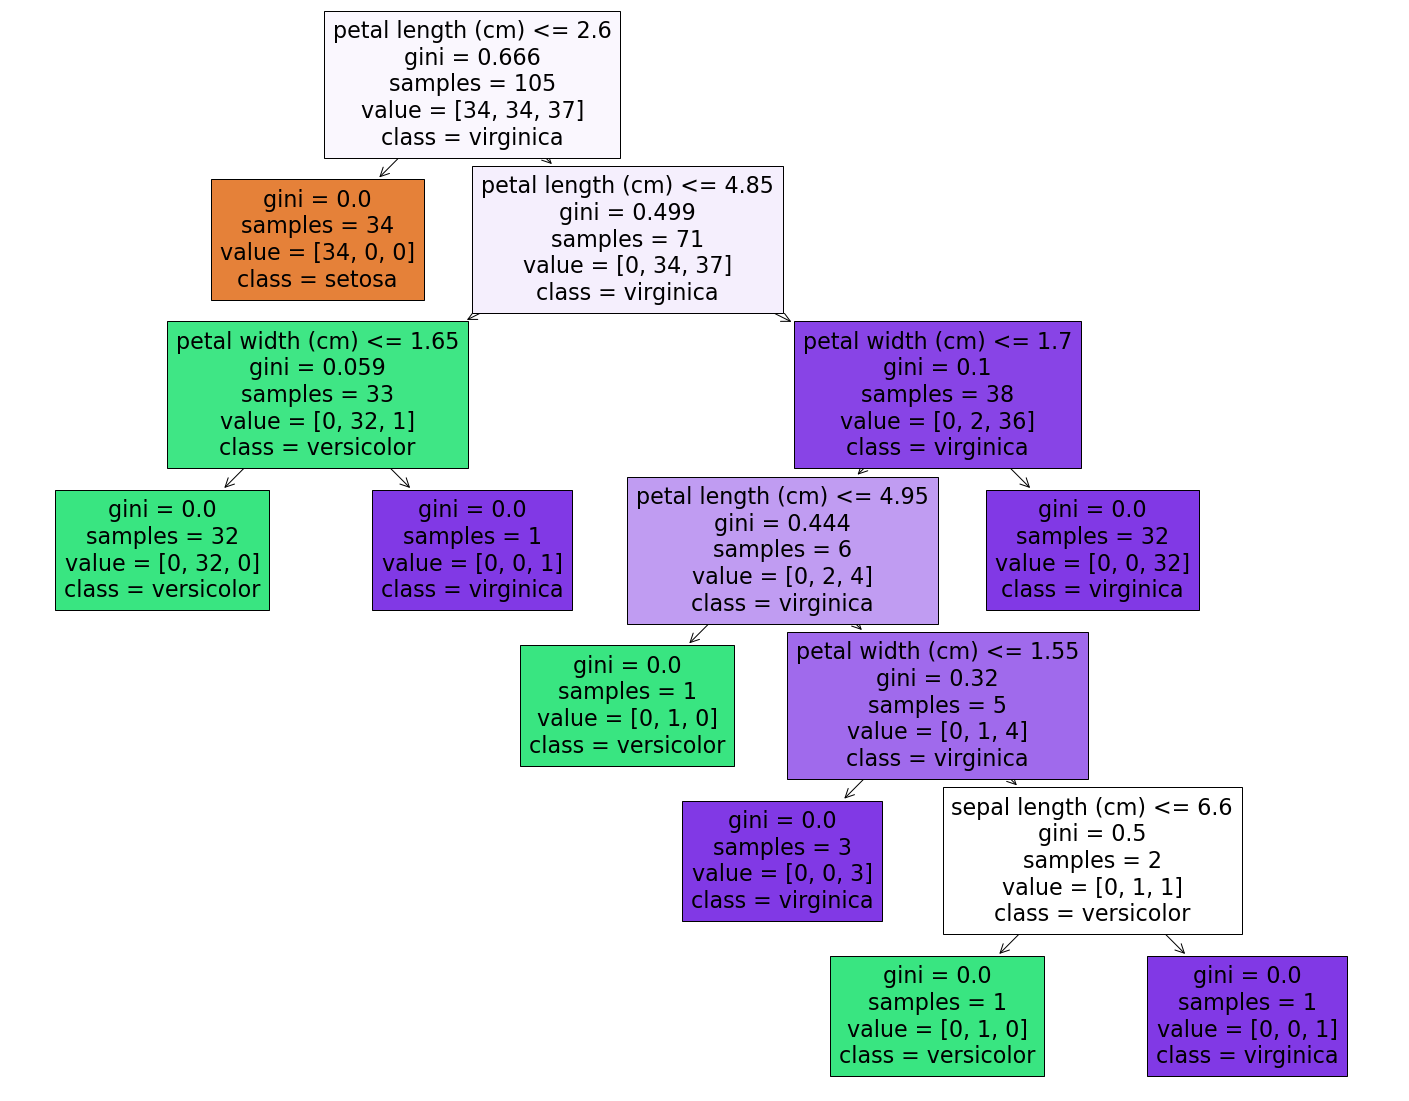

In [25]:
ig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ds_tree, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)